**FINAL PROJECT REPORT**

Test 1

<div class="alert alert-block alert-info">  
    
# **LOAN RISK ASSESMENT**

#### ***Predict whether the loan be approved or denied?***
    
Group 1 : **Payrangers**
- Alif Naufal Falih
- Amelia Nisrinah
- Febrianti
- Jennifer Virginia Cahyadi
- Muhammad Fathan Muttaqy
    
</div>

## **CHAPTER I. DATASET INTRODUCTION**

<div align='justify'>
Dataset <b>SBAnational.csv</b> adalah dataset yang berasal dari <i>U.S. Small Business Administration (SBA)</i>. SBA berperan dalam mempromosikan dan membantu <i>Small Business</i> di pasar kredit AS, dengan tujuan mendorong pembentukan dan pertumbuhan <i>Small Business</i> di AS. Hal ini memberikan manfaat sosial untuk menciptakan kesempatan kerja dan mengurangi pengangguran. SBA memberikan sebagian jaminan dari pinjaman yang diajukan oleh pihak <i>Small Business</i> kepada BANK. SBA membantu mengurangi risiko yang dihadapi pemilik bisnis dengan menutupi beberapa kerugian jika pihak <i>Small Business</i> gagal bayar. Namun hal ini sangat beresiko bagi SBA, dimana SBA harus selektif dan ketat dalam menentukan pihak <i>Small Business</i> yang akan diterima atau tidak untuk diberikan sebagian jaminan pinjaman agar tidak merugikan pihak SBA.
</div>

<br/>

<div align='justify'>
Kondisinya jumlah pihak <i>Small Business</i> yang mengajukan pinjaman sangat banyak, sedangkan pengecekan untuk persetujuan atau penolakan pinjaman yang dilakukan oleh SBA masih dilakukan manual. Dengan demikian dibutuhkan sebuah <i>Model Machine Learning</i> yang dapat melakukan penilaian terhadap resiko pinjaman, sehingga dapat memprediksi apakah pinjaman akan disetujui atau ditolak.
</div>

</br>

<div align='justify'>
Berdasarkan latar belakang tersebut kami bermaksud melakukan analisa pada data historis yang ada, untuk membuat <i>Machine Laerning Model</i> yang dapat memprediksi penilaian risiko pinjaman, apakah pinjaman yang diajukan oleh pihak <i>Small Business</i> layak untuk disetujui atau ditolak. Sehingga dapat 
dicapainya tujuan berikut :
<br/>
<br/>
<i> 1. Daily resolved application</i> (banyaknya pengajuan yang berhasil di-review per hari), tanpa menambah cost untuk menambah karyawan
<br/>
<i>2. Failed pay ratio</i> (rasio gagal bayar dari total pinjaman yang diterima), yakni meminimalisir risiko adanya peminjam yang tidak mampu membayar pinjaman
</div>

**Problem Statement:**
.......

**Role:**
Tim Data Scientist dari pihak Bank.

**Goal:**
Meningkatkan efektivitas dalam melakukan review terhadap calon peminjam  tanpa menambah cost serta meminimalisir risiko adanya peminjam yang tidak mampu membayar pinjaman

**Business Metrics:**
- Metrics Utama : Daily resolved application (banyaknya pengajuan yang berhasil di-review per hari)
- Metrics Sekunder : Failed pay ratio (rasio gagal bayar dari total borrower yang di-approve)

**Objective:**
Membuat model untuk memprediksi apakah suatu pinjaman akan diterima atau ditolak secara otomatis.
Dengan adanya model ini, daily resolved application akan meningkat karena banyak pengajuan yang di-review secara otomatis oleh model, serta meminimalisir risiko gagal bayar dari peminjam.


## **CHAPTER II. PREPARATION**

- 2.1. Import Libraries
- 2.2. Load Dataset

### **2.1. Import Libraries**

In [ ]:
#Basic libraries :
import numpy as np
import pandas as pd
import math
import datetime
from datetime import date

#Python Data Visualization Libraries :
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

#### Customizing Method

**Matplotlib**

In [ ]:
rcParams['figure.figsize']  = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**Format Display**

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns',None)

### **2.2. Load Dataset**

#### **2.2.1. Load Dataset**

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afterjan99
Your Kaggle Key: ··········


100%|██████████| 46.4M/46.4M [00:00<00:00, 169MB/s]


In [ ]:
df_SBAnational = pd.read_csv('/content/should-this-loan-be-approved-or-denied/SBAnational.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df_SBAnational.copy()
df.sample(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
667240,6772894001,CURVES FOR WOMEN,TUNKHANNOCK,PA,18657,"NBT BANK, NATIONAL ASSOCIATION",NY,713940,8-Oct-03,2004,19,4,0.000,0,0,1,2,N,N,NaN,31-Dec-03,"$68,000.00",$0.00,P I F,$0.00,"$68,000.00","$57,800.00"
367096,3564114003,ALLSTATE INSURANCE,LAS VEGAS,NV,89120,NEVADA STATE BANK,NV,524210,1-Feb-00,2000,120,1,1.000,1,1,1,1,0,N,NaN,31-Mar-00,"$211,700.00",$0.00,P I F,$0.00,"$211,700.00","$158,775.00"
190242,2348026004,SPINKA MIKVA REALTY INC,MONSEY,NY,10952,JPMORGAN CHASE BANK NATL ASSOC,IL,236118,22-Aug-06,2006,84,5,1.000,2,5,1,2,Y,N,NaN,30-Sep-06,"$43,181.00",$0.00,P I F,$0.00,"$30,000.00","$15,000.00"


In [ ]:
#untuk mengetahui dimensi dari dataframe
df.shape 

(899164, 27)

#### **2.2.2 Load Data Dictionary (Description of Variable)**

##### **a. Description of 27 Variables in Both Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_27_variabels = pd.read_csv('/content/drive/MyDrive/Amelia Nisrinah/Rakamin Academy - Data Science/Sharing Folder - Final Project Klp 1 Batch 24/SOURCE CODE FINAL PROJECT (PIC AMEL)/Source Data/Description of 27 variables in both datasets.csv')
df_27_variabels

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier – Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American industry classification system ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


##### **b. Description of The First Two Digits of NAICS**

In [ ]:
df_2digit_naics = pd.read_csv('/content/drive/MyDrive/Amelia Nisrinah/Rakamin Academy - Data Science/Sharing Folder - Final Project Klp 1 Batch 24/SOURCE CODE FINAL PROJECT (PIC AMEL)/Source Data/Description of the first two digits of NAICS.csv')
df_2digit_naics

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31–33,Manufacturing
5,42,Wholesale trade
6,44–45,Retail trade
7,48–49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


<div align='justify'>
<b>NAICS <i>(North American Industry Classification System)</i></b> adalah sistem klasifikasi hierarkis 2 hingga 6 digit yang digunakan oleh badan statistik Federal dalam mengklasifikasikan perusahaan bisnis untuk pengumpulan, analisis, dan penyajian data statistik yang menggambarkan ekonomi AS. Dua digit pertama klasifikasi NAICS mewakili sektor ekonomi.
</div>

## **CHAPTER III. EXPLORATORY DATA ANALYSIS (EDA)**

- 3.1. Descriptive Statistics
- 3.2. Univariate Analysis
- 3.3. Multivariate Analysis
- 3.4. Business Insight

### **3.1. Descriptive Statistics**

#### **3.1.1. General Information of DataFrame**

Menampilkan informasi umum mengenai dataframe, terkait jumlah dan nama kolom, *Null Values* dan *Data Types*

##### **a. df.info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

##### **b. Check null value**

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# Mengitung total null value
tot_nullvalue = (df.isnull().sum()).sum()
tot_nullvalue

751259

In [ ]:
# Persentase null value keseluruhan data
gtot_null = tot_nullvalue.sum()/len(df)*100
gtot_null

83.55083166140993

In [ ]:
# Mengitung total null value tanpa feature 'ChgOffDate'
gtot_null_nonChgOffDate = tot_nullvalue.sum() - df['ChgOffDate'].isnull().sum()
gtot_null_nonChgOffDate

14794

In [ ]:
# Persentase null value tanpa feature 'ChgOffDate'
gtot_null_nonChgOffDate/len(df)*100

1.6453060843183223

##### **c. Observation result**

**df.info() :**
- Data terdiri dari 899,164 **baris** dan 27 **kolom**
- Setiap baris merepresentasikan satu peminjam
- Terdapat kolom yang **belum sesuai dengan tipe data seharusnya**, yakni : <br>
  * Ada **3** kolom yang seharusnya bertipe data ***datetime*** tetapi **terdeteksi object**, yakni :
    1. ApprovalDate
    2. ChgOffDate
    3. DisbursementDate <br>
  * Ada **6** kolom yang seharusnya **numerik** tetapi **terdeteksi object**, yakni :
    1. DisbursementGross
    2. BalanceGross
    3. ChgOffPrinGr
    4. GrAppv
    5. SBA_Appv
    6. ApprovalFY
  * Kolom NewExist terdeteksi **float** sebaiknya diubah ke dalam bentuk **int**
  * Kolom ' NAICS' sebaiknya dalam bentuk **data kategorik**

**Null Value :**
- Terdapat 11 kolom yang memiliki Null Values:
  - *Name, City, Satate, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status*
- Kolom yang mempunyai nilai kosong paling banyak adalah kolom ChgOffDate dengan jumlah 736,465 yakni sekitar 82% dari total seluruh baris.
- Persentase null values pada dataset sangat tinggi yaitu 83.6% hal tersebut karena feature 'ChgOffDate' memiliki jumlah null values sangat tinggi sehingga perlu diperiksa lebih lanjut.
- Apabila 'ChgOffDate' didrop maka null valuesnya hanya 1.64% sehingga 1 variabel ChgOffDate ini bisa didrop saja.
- Null values pada kolom 'MIS_Status' sebaiknya didrop karena kolom tersebut merupakan target sehingga tidak boleh ada nilai yang kosong


Berikut adalah tabel perbandingan tipe data dari hasil df.info() dan library dari dataFrame :


#### **3.1.2. Change Data Type**

###### **a. Object to DateTime**

Untuk 3 kolom yang seharusnya bertipe data *datetime* tetapi terdeteksi object, yakni *ApprovalDate, ChgOffDate,* dan *DisbursementDate*, maka dirubah kedalam format *datetime* :

In [ ]:
# Memeriksa value pada features
df[['ApprovalDate','DisbursementDate','ChgOffDate']].sample(2)

,ApprovalDate,DisbursementDate,ChgOffDate
544198,12-Apr-02,30-Jun-02,NaN
617183,27-Feb-03,30-Apr-03,7-Aug-08


In [ ]:
# Mengubah tipe data menjadi datetime
to_datetime = ['ApprovalDate','DisbursementDate','ChgOffDate']
df[to_datetime] = df[to_datetime].apply(pd.to_datetime)

###### **b. Object to Numeric**

Untuk **6 kolom** yang seharusnya numerik tetapi terdeteksi object, yakni **DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv, dan ApprovalFY** :

In [ ]:
# Memeriksa value pada features
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].sample(3)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
564189,"$995,000.00",$0.00,$0.00,"$1,000,000.00","$750,000.00"
377804,"$150,000.00",$0.00,$0.00,"$150,000.00","$112,500.00"
710277,"$42,753.00",$0.00,$0.00,"$30,000.00","$15,000.00"


**Observation Results**:
- Features dibaca sebagai tipe data str karena memiliki tanda '$' dan ','.
- Perlu dilakukan cleansing data sebelum diubah menjadi tipe data float.

In [ ]:
# Cleansing data
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[currency] = df[currency].applymap(lambda x: x.strip().replace('$','').replace(',',''))

# Merubah tipe data menjadi numeric (float)
df[currency] = df[currency].astype(float)

In [ ]:
# Memeriksa values pada 'ApprovalFY'
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

**Observation Result:**
Terdapat dua tipe data pada feature 'ApprovalFY' yaitu int dan str, dimana ada huruf A pada tipe data str pada tahun 1976.

In [ ]:
# Membuat fungsi untuk membersihkan value string
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
    
# Cleansing data dan merubah tipe data ApprovalFY menjadi numeric (int)
df['ApprovalFY'] = df['ApprovalFY'].apply(clean_str).astype('int')
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

###### **c. Float to Int**

In [ ]:
# Memeriksa values NewExist
df['NewExist'].unique()

array([ 2.,  1.,  0., nan])

In [ ]:
# Karena nilai null pada NewExist hanya sedikit (136) maka akan didrop agar tipe datanya dapat diubah ke int
df.dropna(subset=['NewExist'],inplace=True)

# Merubah tipe data menjadi int
df['NewExist'] = df['NewExist'].astype(int)

# Memeriksa values NewExist setelah diubah tipe datanya
df['NewExist'].unique()

array([2, 1, 0])

###### **d. Numeric to Object**

In [ ]:
# Merubah tipe data menjadi str
df['NAICS'] = df['NAICS'].astype(str)

##### **e. Recheck Data Type**

Lihat kembali tipe data dari setiap kolom :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899028 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899028 non-null  int64         
 1   Name               899014 non-null  object        
 2   City               898998 non-null  object        
 3   State              899014 non-null  object        
 4   Zip                899028 non-null  int64         
 5   Bank               897469 non-null  object        
 6   BankState          897462 non-null  object        
 7   NAICS              899028 non-null  object        
 8   ApprovalDate       899028 non-null  datetime64[ns]
 9   ApprovalFY         899028 non-null  int64         
 10  Term               899028 non-null  int64         
 11  NoEmp              899028 non-null  int64         
 12  NewExist           899028 non-null  int64         
 13  CreateJob          899028 non-null  int64   

**Observation Result:** Dapat dilihat dari df.info() untuk kolom-kolom yang sudah dilakukan reformating tipe data, sudah sesuai dengan tipe data yang seharusnya.

#### **3.1.X. Ad Hoc**

##### **b. Column Industry**

In [ ]:
df2=df.copy()
df2['Industry'] = df2['NAICS'].apply(lambda x: x[:2])
# Menggabung kolom Industri
df2['Industry'] = df2['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv', 
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [ ]:
df2.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail_trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accom/Food_serv


In [ ]:
categoric3 = ['LoanNr_ChkDgt','Name','City','State','Zip','Bank','BankState',
              'NAICS','NewExist', 'FranchiseCode','UrbanRural', 'RevLineCr','LowDoc','MIS_Status','Industry']
df2[categoric3]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,2.0,1,0,N,Y,P I F,Retail_trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,2.0,1,0,N,Y,P I F,Accom/Food_serv
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1.0,1,0,N,N,P I F,Healthcare/Social_assist
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1.0,1,0,N,Y,P I F,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1.0,1,0,N,N,P I F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1.0,1,0,0,N,P I F,Retail_trade
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1.0,1,0,Y,N,P I F,Retail_trade
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1.0,1,0,N,N,P I F,Manufacturing
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1.0,1,0,N,Y,CHGOFF,NaN


#### **3.1.3. Statistical Summary**

In [ ]:
# Untuk kebutuhan analisis statistik kami akan membuat tipe data kolom sesuai dengan tipe datanya

df_stat = df.astype({'LoanNr_ChkDgt': 'str', 
               'Zip': 'str', 
               'NewExist': 'str', 
               'NAICS': 'str', 
               'FranchiseCode': 'str', 
               'UrbanRural': 'str',
               'ApprovalFY': 'str'
            })

In [ ]:
#Kolom dengan tipe data Numerik (total 9 kolom)
numeric = ['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross',
            'BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']

#Kolom dengan tipe data Ketegorik (total 14 kolom)
categoric = ['LoanNr_ChkDgt','Name','City','State','Zip','Bank','BankState',
              'NAICS','NewExist','FranchiseCode','UrbanRural', 'RevLineCr','LowDoc','MIS_Status']

#Kolom dengan tipe data datetime (total 4 kolom)
datetime = ['ApprovalDate','ApprovalFY','ChgOffDate','DisbursementDate']

##### **a. Descriptive Statistics - Numeric**

In [ ]:
df_stat[numeric].describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00
mean,110.78,11.41,8.43,10.80,201142.05,2.99,13504.54,192676.07,149480.28
std,78.86,74.11,236.71,237.14,287552.13,1442.27,65156.27,283172.84,228323.66
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,100.00
25%,60.00,2.00,0.00,0.00,42000.00,0.00,0.00,35000.00,21250.00
50%,84.00,4.00,0.00,1.00,100000.00,0.00,0.00,90000.00,61285.00
75%,120.00,10.00,1.00,4.00,238000.00,0.00,0.00,225000.00,175000.00
max,569.00,9999.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


**Observation Result :**
- Dilihat dari jarak nilai median dan rata-rata pada keseluruhan variabel dapat disimpulkan bahwa datanya skewed.
- Dari nilai Max/Min keseluruhan variabel, dapat disimpulkan hampir seluruh variabel memiliki outliers.

- **Term** (jangka waktu pinjaman dalam bulan)
  - Kolom Term adalah jangka waktu pinjaman dalam bulan, jika dilihat dari nilai minimunnya adalah 0 sedangkan untuk jangka waktu pinjaman seharusnya tidak ada yang dibawah 1 bulan.
  - Pada dokumen dataset disebutkan terdapat pinjaman yang didukung oleh Real Estate (dijadikan agunan) yg dapat dijadikan indikator resiko pemberian pinjaman. Alasan untuk indikator ini adalah bahwa nilai Real Estate cukup besar untuk menutupi jumlah pinjaman, sehingga mengurangi kemungkinan gagal bayar. Pada dokumen dataset pinjaman yang didukung oleh real estate akan memiliki jangka waktu 20 tahun atau lebih (≥240 bulan). Untuk itu feature term dapat digunakan untuk membuat variabel dummy yg menunjukkan apakah pinjaman didukung oleh real estate atau tidak. 

- **NoEmp** (Jumlah karyawan yang dimiliki) <br>
Pada variable NoEmp nilai minimunya adalah 0, sedangkan NoEmp adalah jumlah karyawan bisnis yang dimiliki, dan tidak mungkin jika sebuah perusahaan tidak memiliki karyawan sama sekali. Kemungkinan ada kesalahan dalam input datanya.

- **RetainedJob**
 - Feature ini memiliki 25% data bernilai 0.
 - Dari feature ini lebih baik dibuat feature baru yg menunjukkan apakah bisnis memiliki karyawan tetap atau tidak.

-  **BalanceGross dan ChgOffPrinGr** <br>
75% data memiliki nilai 0 sehingga dua features ini akan didrop saja.

- **SBA_Appv** <br>
SBA_Appv menunjukkan jumlah jaminan yang diberikan oleh SBA kepada bank. Sebaiknya value dari feature ini dibuat dalam bentuk persentase.

- **DisbursementGross** <br>
Terdapat anomali pada nilai minimum yaitu 0, dimana hal ini tidak mungkin.







##### **b. Descriptive Statistics - Categoric**

In [ ]:
df_stat[categoric].describe()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
count,899028,899014,898998,899014,899028,897469,897462,899028,899028,899028,899028,894500,896449,897033
unique,899028,779475,32581,51,33611,5802,56,1312,3,2768,3,18,8,2
top,1000014003,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,0,1,1,1,N,N,P I F
freq,1,1269,11558,130608,933,86852,118112,201948,644869,638554,470547,420194,782690,739489


**Observation Result :**

- **LoanNr_ChkDgt, Name, Bank**, mempunyai kardinalitas yang tinggi, dan sepertinya tidak berpengaruh terhadap target sehingga akan didrop.

- **City** dan **Zip** mempunyai kardinalitas yang tinggi dan dapat digantikan oleh feature State sehingga kedua features ini akan didrop.

- **State** dan **BankState** memiliki unique value yang cukup banyak, akan lebih mudah apabila dilakukan feature engineering dengan membuat feature baru yg menunjukkan state peminjam apakah sama dengan state bank untuk dilihat pengaruhnya terhadap target. Selain itu perlu dilihat berapa default rate pada masing-masing State.

- Pada dokumentasi dataset disebutkan bahwa dua digit pertama pada kode **NAICS** menunjukkan industri dari bisnis yg dijalankan oleh peminjam. Berdasarkan hal ini akan dibuat kolom baru untuk mengklasifikasikan NAICS berdasarkan nama sektor industrinya.

- **NewExist** terdeteksi memiliki 3 *unique value*, sedangkan seharusnya hanya ada 2 *unique value* yakni, 
1 = *Existing business*,
2 = *New business*

- Feature **FranchiseCode** menunjukkan kode franchise dimana nilai 00000 atau 00001 = No franchise, jadi sebaiknya kolom ini dibuat *boolean value*.

- **RevLineCr** terdeteksi memiliki 18 unique values, sedangkan seharusnya hanya ada 2 unique value yakni, 
Revolving line of credit: 
Y = Yes, N = No
kemungkinan ada kesalahan input.

- **LowDoc** terdeteksi memiliki 8 unique values, sedangkan seharusnya hanya ada 2 unique value yakni, 
LowDoc Loan Program: Y = Yes, N = No
kemungkinan ada kesalahan input. Berdasarkan dokumentasi dataset feature ini menunjukkan jumlah dokumen yang diperlukan berdasarkan besaran pinjaman dimana ketika nilai pinjaman < 150.000 dokumen yg diperlukan sedikit (LowDoc='Y') sementara ketika pinjaman >= 150.000 dokumen yg diperlukan lebih banyak (LowDoc='N').

- **MIS_Status** <br>
 - Terdiri dari 2 unique values yaitu:
   * P I F = Paid in full, yakni pinjaman yang dibayar lunas
   * CHGOFF = Loan status charged off, yakni pinjaman yang gagal dibayarkan
 - Total value sebanyak 897033 dengan value didominasi oleh P I F sebanyak 739489. Dari sini dapat disimpulkan bahwa target imbalace sehingga perlu dilakukan over sampling atau under sampling saat pre-processing nantinya.




###### **Value Counting**

Mereview lebih detil jumlah value pada masing-masing feature.

In [ ]:
for column in categoric:
    print(f'''Value count kolom {column}:''')
    print(df_stat[column].value_counts())
    print()

Value count kolom LoanNr_ChkDgt:
1000014003    1
5945503009    1
5945354008    1
5945364000    1
5945373007    1
             ..
3072554010    1
3072555006    1
3072556002    1
3072564002    1
9996003010    1
Name: LoanNr_ChkDgt, Length: 899028, dtype: int64

Value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
OFFICE FURNITURE MART OF INDPL       1
Gerard J. Tremblay, Jr dba Ame       1
ACTIVE LIFE CHIROPRACTIC PC          1
VARIANCE SERVICES INC                1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779475, dtype: int64

Value count kolom City:
LOS ANGELES                       11558
HOUSTON                           10246
NEW YORK                           7846
CHICAGO                            6033
MIAMI                              5592
                     

##### **c. Descriptive Statistics - Time**

In [ ]:
df_stat[datetime].describe(include=['datetime','object'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ApprovalDate,ApprovalFY,ChgOffDate,DisbursementDate
count,899028,899028,162685,896660
unique,9859,51,6448,8472
top,1993-07-07 00:00:00,2005,2010-03-13 00:00:00,1995-07-31 00:00:00
freq,1131,77525,734,10371
first,1972-02-01 00:00:00,NaN,1988-10-03 00:00:00,1972-02-01 00:00:00
last,2071-12-20 00:00:00,NaN,2026-10-22 00:00:00,2071-12-31 00:00:00


**Observation Result:**
1. 75% data pada feature **ChgOffDate** berisi null value, feature ini menunjukkan tanggal ketika peminjaman dinyatan gagal maka ketika peminjam berhasil dibayar kolom tersebut nilainya null. Feature ChgOffDate lebih baik didrop nantinya, karena kita bisa berfokus dengan kolom MIS_Status status saja.
2. **ApprovalDate** dan **ApprovalFY** merujuk pada waktu pinjaman disetujui, kedua features ini tidak dapat menjadi preditor target sehingga sepertinya akan didrop. Selain itu pada feature ApprovalDate terdapat anomali waktu terakhir yang menunjukkan tahun 2071.
3. **DisbursementDate** menunjukkan tanggal pinjaman dicairkan. Terdapat anomali pada data waktu awal dan akhir. Menurut dokumentasi data ini diambil dari tahun 1987-2014, kemungkinan ada salah input pada data.

### **3.2. Univariate Analysis**

#### **3.2.1. Univariate Analysis - Numeric**

##### **a. Individual Boxplots**

In [ ]:
# Memilih features yang diperkirakan berpengaruh terhadap target berdasarkan Statistical Summary
# untuk dilakukan Univariate dan Multivariate analysis

#Kolom dengan tipe data Numerik (total 7 kolom)
numeric_viz = ['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross',
            'GrAppv','SBA_Appv']

#Kolom dengan tipe data Ketegorik (total 8 kolom)
categoric_viz1 = ['NewExist','UrbanRural','RevLineCr','MIS_Status']
categoric_viz2 = ['State','BankState']

#Kolom dengan tipe data datetime (total 2 kolom)
datetime_viz = ['DisbursementDate']

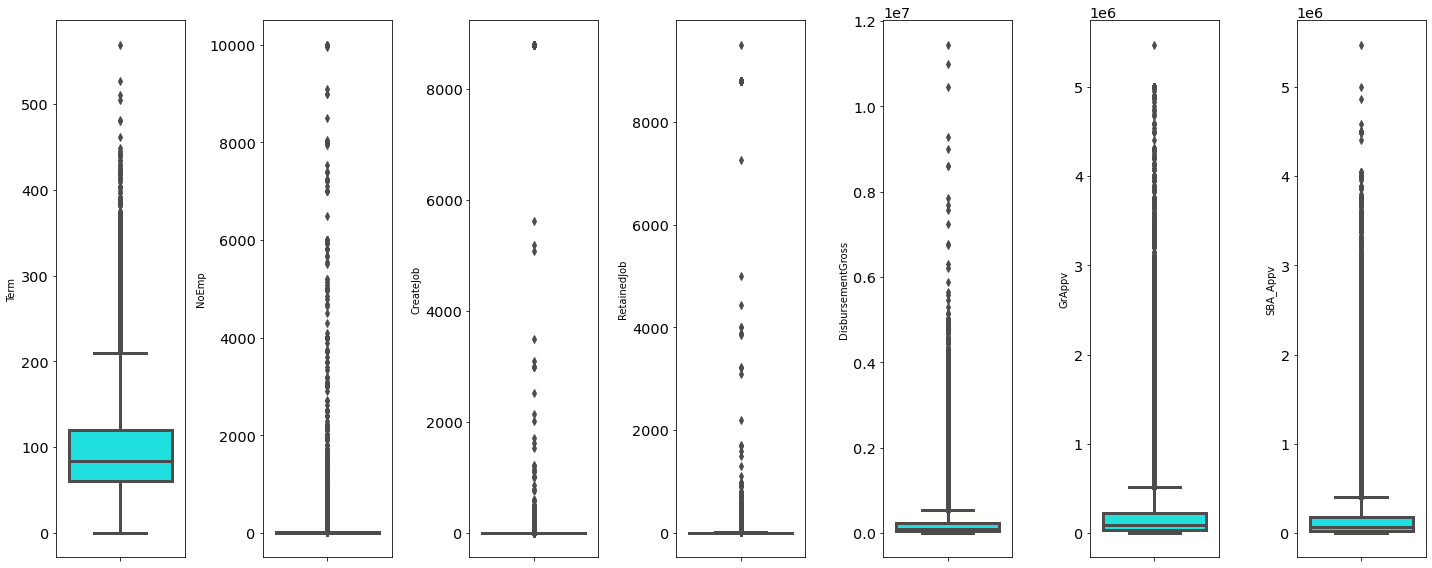

In [ ]:
features = numeric_viz
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_stat[features[i]], color='cyan', orient='v')
    plt.tight_layout()

**Observation Result :**

Terlihat outlier dengan distribusi positively skewed pada seluruh features numeric sehingga perlu dilakukan handling outlier.

##### **b. Individual Displot**

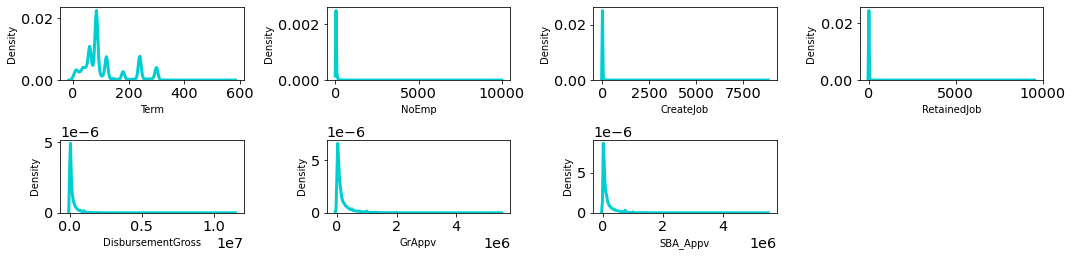

In [ ]:
features = numeric_viz
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(x=df_stat[features[i]], color='darkturquoise')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observation Result :**
Seluruh feature terlihat positively skewed sehinga dibutuhkan log tranformation untuk data yg berpengaruh terhadap target.


#### **3.2.2. Univariate Analysis - Categoric**

##### **a. Individual Countplot**  

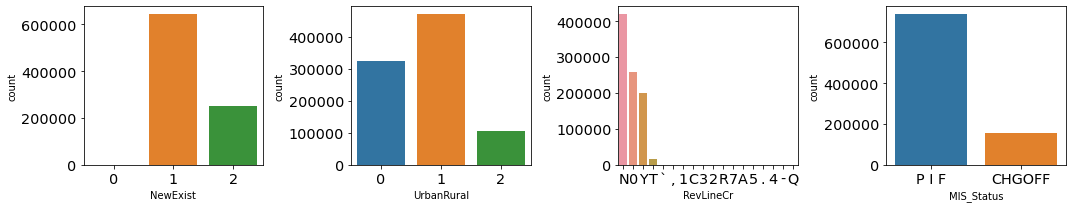

In [ ]:
plt.figure(figsize=(15,3))
features = categoric_viz1

for i in range(0,len(features)):
    plt.subplot(1,4,i+1)
    sns.countplot(x=df[features[i]])
    plt.tight_layout()

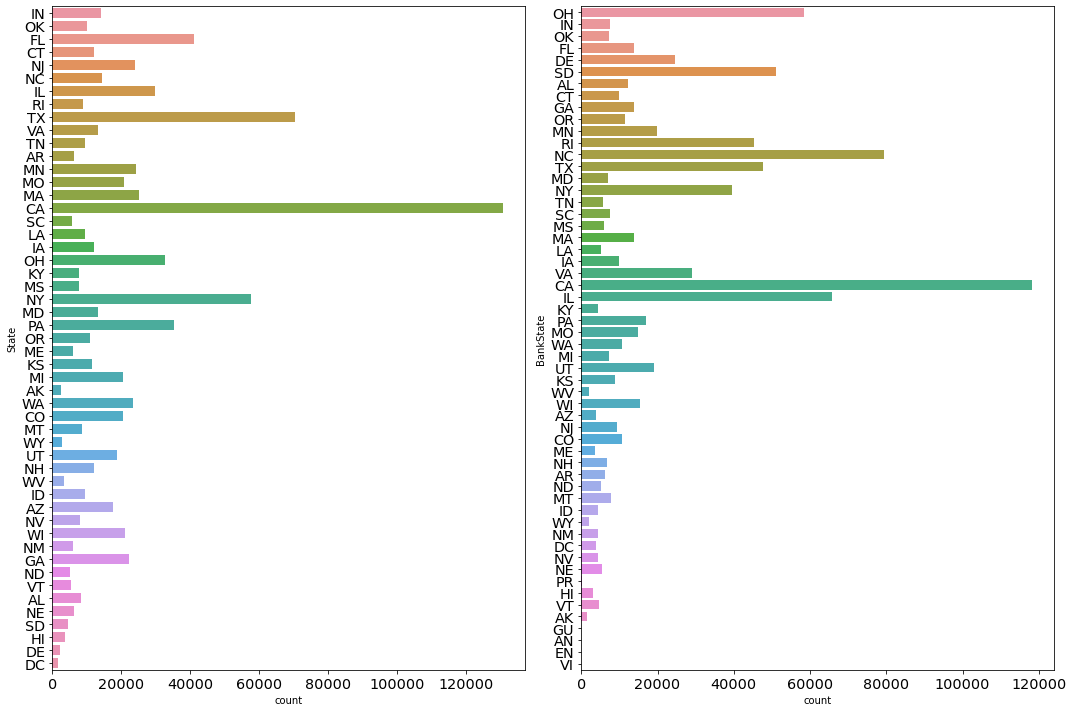

In [ ]:
plt.figure(figsize=(15,10))
features = categoric_viz2

for i in range(0,len(features)):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[features[i]])
    plt.tight_layout()

**Observation Result :**


#### **3.2.3. Univariate Analysis - Date Time**

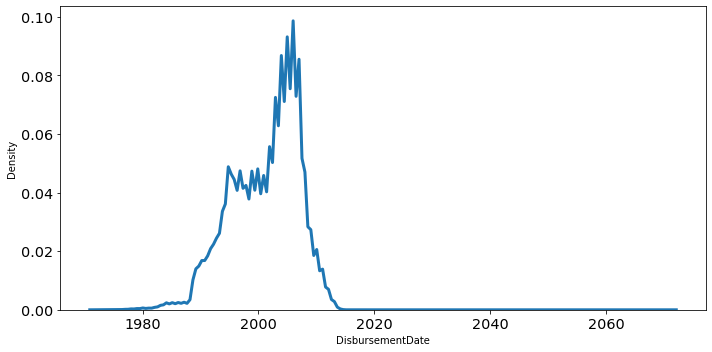

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_stat['DisbursementDate'].dt.year)
plt.tight_layout()

**Observation Result:**
- Pinjaman paling banyak diapprove dan dicairkan pada tahun sekitar 2000-2010.
- Sepertinya terdapat banyak kesalahan input data tahun pada feature DisbursementDate.

### **3.3. Multivariate Analysis**

#### **3.3.1. Multivariate Analysis - Numeric**

##### **a. Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Variables')

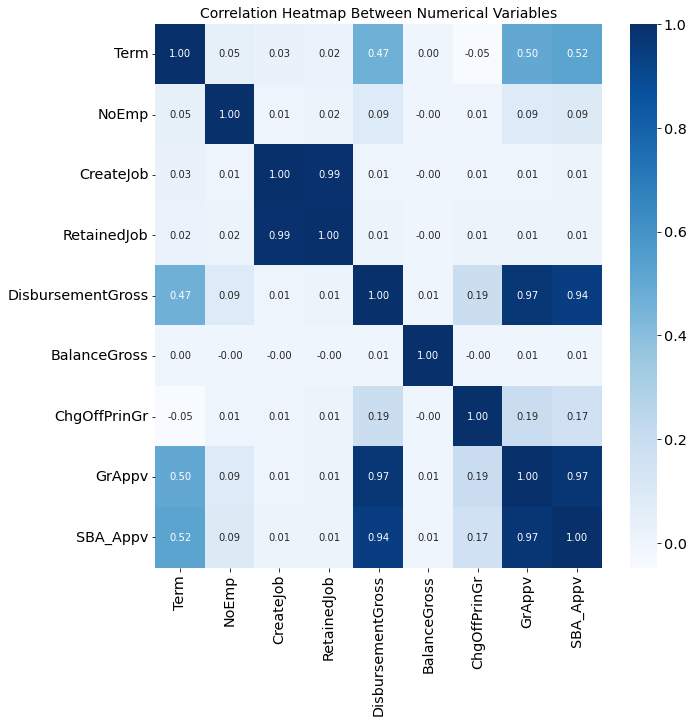

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_stat.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Variables', fontsize=14)

**Pengamatan** :

- **Term** memiliki korelasi yang positif dengan **DisbursementGross, Gross Approved**, dan **SBA_Appv**. Hal tersebut mengindikasikan jangka waktu pinjaman yang lebih lama berpotensi memiliki nilai pinjaman yang lebih besar.
- **DisbursementGross, GrAppv,** dan **SBA_Appv** memiliki korelasi yang kuat satu sama lain. Ada kemungkinan bahwa ketiganya redundant sehingga perlu dipilih salah satu saja apabila akan dijadikan feature.
- **DisbursementGross, GrAppv,** dan **SBA_Appv** memiliki korelasi dengan **ChgoffPrinGr**. Hal tersebut masuk akal karena semakin besar nilai pinjaman yang diberikan, maka apabila terjadi Chgoff atau gagal bayar nilainya Chgoff yang diwakili ChgoffPrinGr akan lebih besar
- **CreateJob** dan **RetainedJob** sama-sama memiliki korelasi 0.99 bersifat redundant sehingga hanya dipilih salah satu saja apabila akan dijadikan feature.
- **DisbursementGross** berkolerasi positif dengan **NoEmp** hal ini menunjukkan bahwa semakin banyak jumlah karyawan (indikasi perusahaan yang lebih besar) maka semakin besar jumlah pinjaman yang cair.


##### **b. Pair Plot**

<Figure size 1080x1080 with 0 Axes>

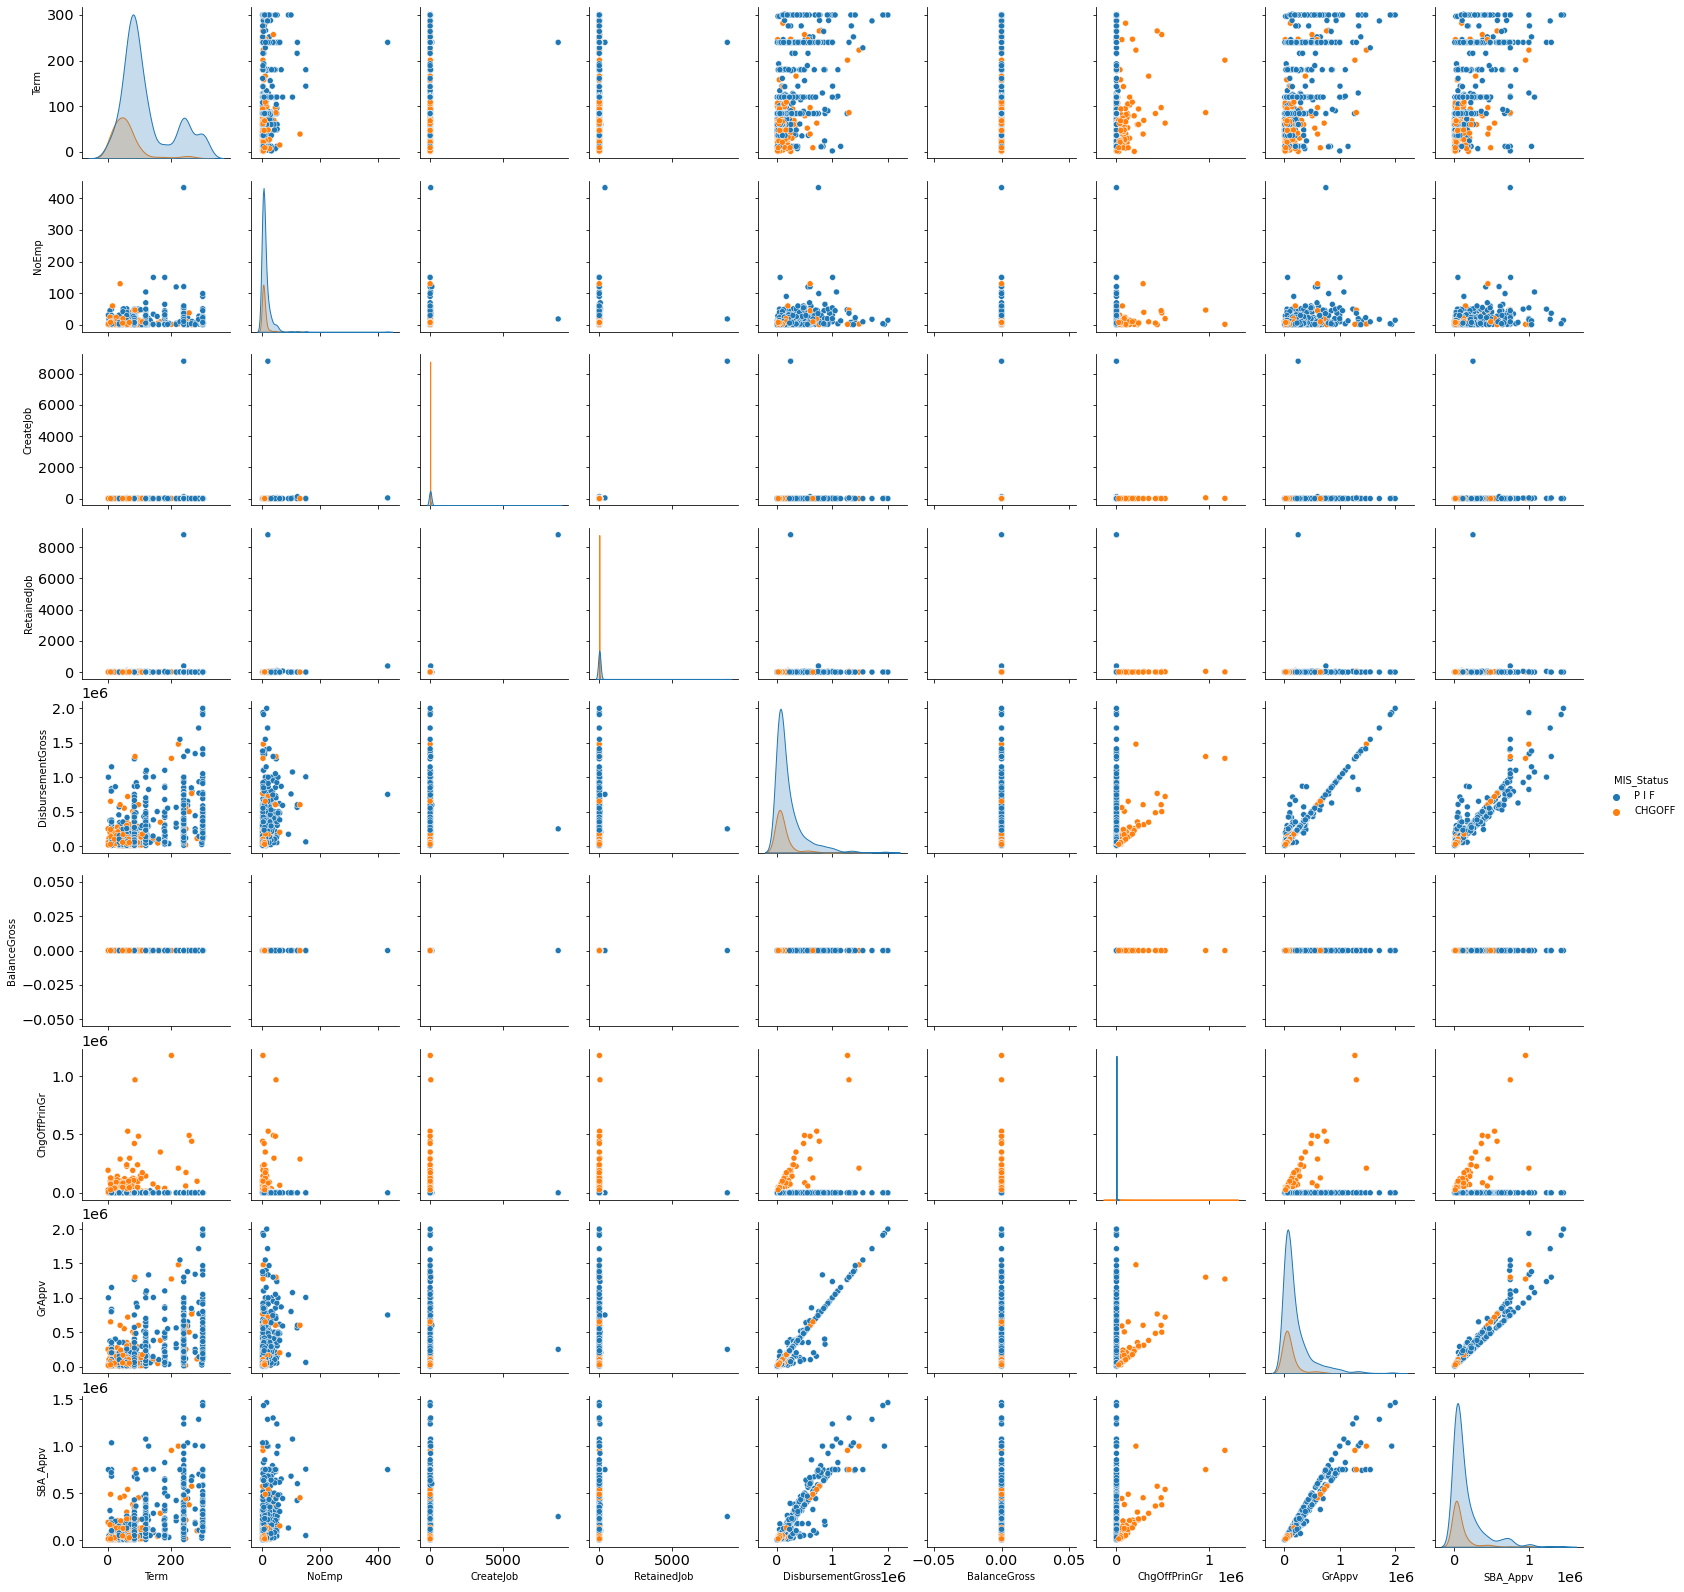

In [ ]:
#Using data sample 

df_sample = df.sample(1000, random_state=1)
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde', hue='MIS_Status')

**Pengamatan:**

- **SBA Approved**, **Disbursement Gross** dan **Gross Approved** memiliki korelasi linier positif satu sama lain.
- Nilai pencairan pinjaman yang rendah (**Disbursement Gross**) terpusat pada jangka waktu pinjaman yang singkat.
- Feature **Term** dapat menjadi indikator yang baik terhadap taget dilihat dari kdeplotnya puncak distribusi dari P I F dan CHGOFF cukup terpisah. Dengan jangka waktu pinjaman yang lebih lama pinjaman yang berhasil bayar lebih banyak dibandingkan dengan yang gagal bayar. 
- Hubungan **NoEmp** dan **ChgOffPrinGr** dapat memisahkan target dengan baik dimana semakin bayak jumlah employee maka nilai ChgOffPrinGr cenderung lebih kecil dan kemungkinan pinjaman dibayarkan lebih tinggi.

##### **c. Annova**

**Hipotesis** <br>
H0 = Term tidak mampu membedakan MIS_Status <br>
H1 = Term mampu membedakan MIS_Status






In [ ]:
import scipy.stats as st

In [ ]:
default = df[df['MIS_Status']=='CHGOFF']
paid = df[df['MIS_Status']=='P I F']

for i in range(0,len(numeric_viz)):
  df.groupby('MIS_Status')[numeric_viz[i]].mean()
  anova = st.f_oneway(default[numeric_viz[i]],paid[numeric_viz[i]])
  pvalue = anova.pvalue
  print(f'Pvalue {numeric_viz[i]}: {pvalue}')
  if pvalue >= 0.05:
    print('Insufficient Reject H0')
  else:
    print('Sufficient Reject H0')
    print()


Pvalue Term: 0.0
Sufficient Reject H0

Pvalue NoEmp: 1.1848563979530901e-136
Sufficient Reject H0

Pvalue CreateJob: 1.8043882079552313e-29
Sufficient Reject H0

Pvalue RetainedJob: 1.2789476431558583e-31
Sufficient Reject H0

Pvalue DisbursementGross: 0.0
Sufficient Reject H0

Pvalue GrAppv: 0.0
Sufficient Reject H0

Pvalue SBA_Appv: 0.0
Sufficient Reject H0



#### **3.3.2. Multivariate Analysis - Categoric**

##### **a. Countplot**

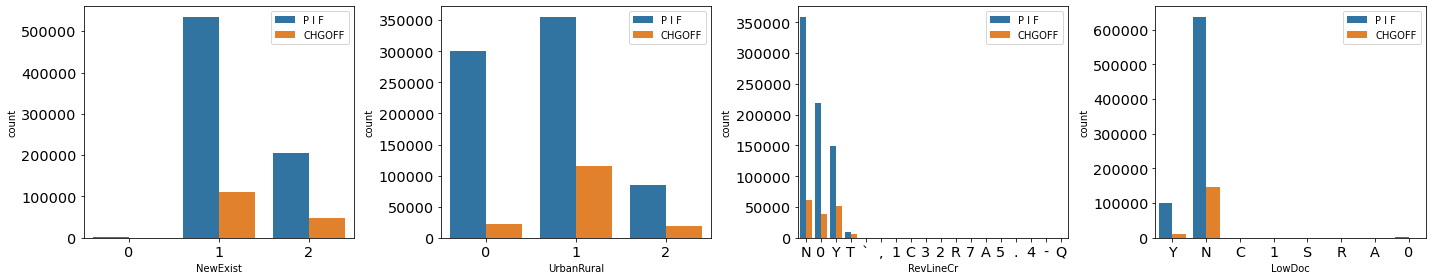

In [ ]:
categoric_countplt = ['NewExist','UrbanRural', 'RevLineCr','LowDoc']

plt.figure(figsize=(20,4))
for i in range(0,len(categoric_countplt)):
    plt.subplot(1,4,i+1)
    sns.countplot(x=df[categoric_countplt[i]],hue="MIS_Status", data=df)
    plt.legend(['P I F', 'CHGOFF'], loc='upper right')
    plt.tight_layout()

MIS_Status by State :

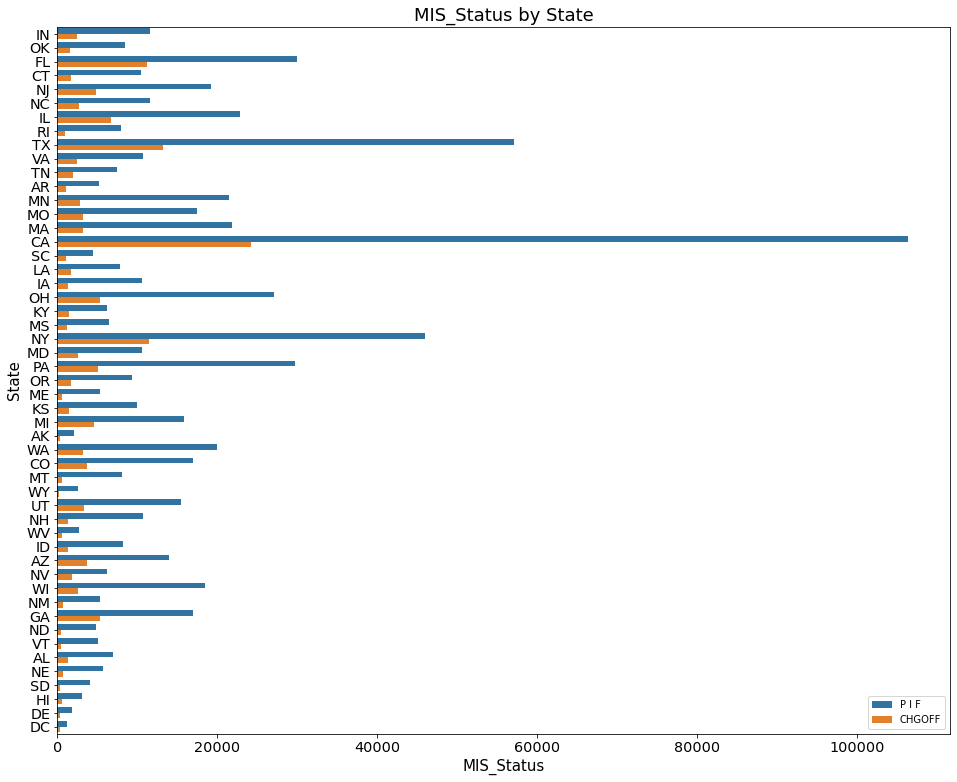

In [ ]:
f, ax = plt.subplots(figsize=(16,13))
sns.countplot(y="State", hue="MIS_Status", data=df)
plt.title('MIS_Status by State', fontsize=18)
plt.xlabel('MIS_Status', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.legend(['P I F', 'CHGOFF'], loc='lower right')

#### **3.3.3 Multivariate Analysis - Date Time**

##### **a. kdeplot**

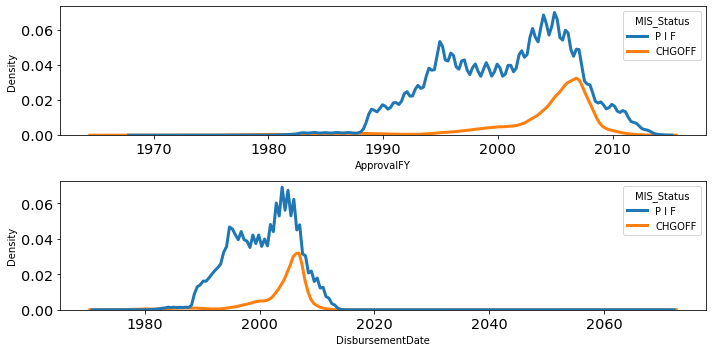

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))
sns.kdeplot(df['ApprovalFY'],hue=df['MIS_Status'],ax=axes[0]);
sns.kdeplot(df['DisbursementDate'].dt.year,hue=df['MIS_Status'],ax=axes[1])
plt.tight_layout()

##### **b. Barplot**

Text(0, 0.5, 'Jumlah Pinjaman ($)')

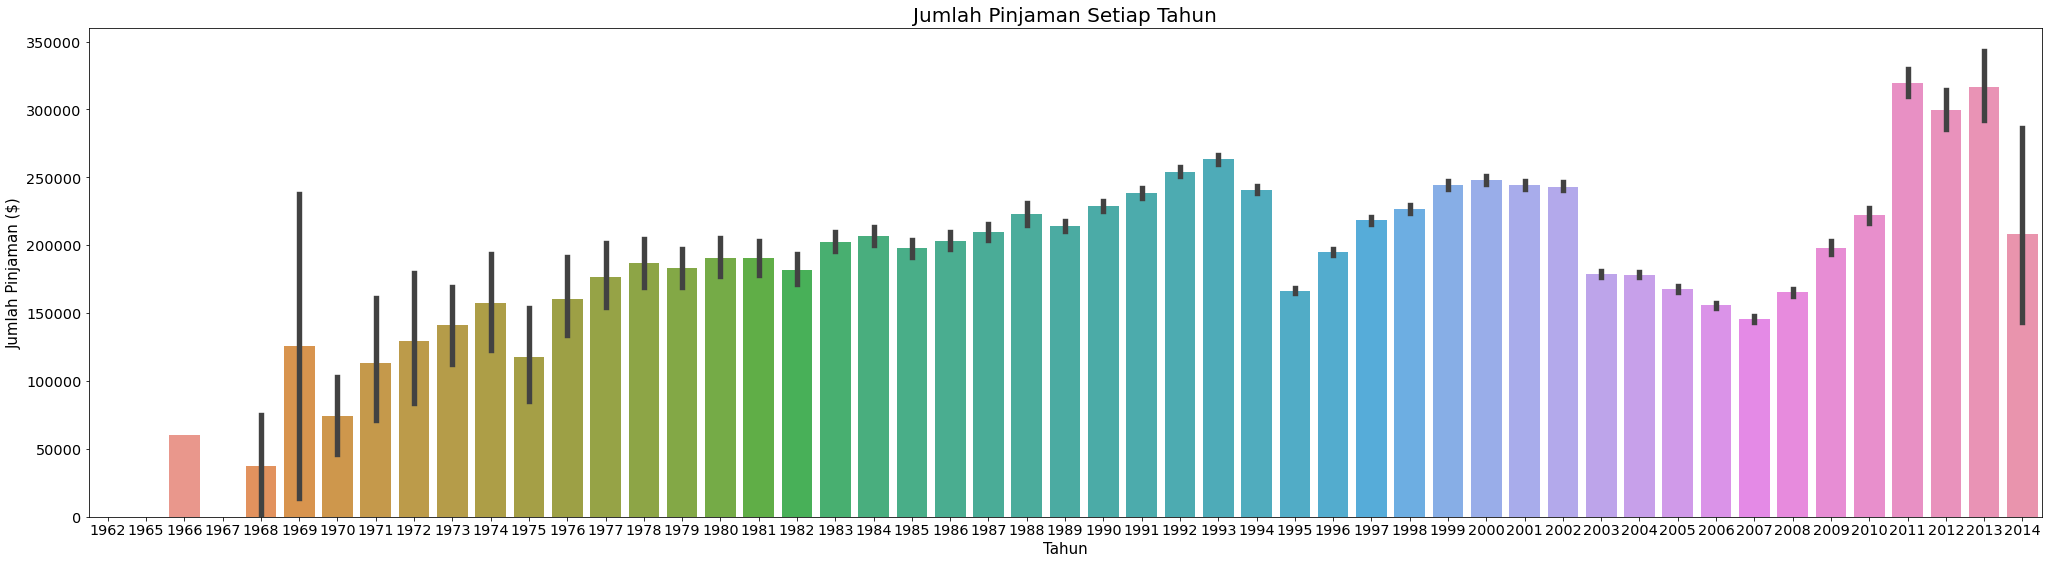

In [ ]:
#Membuat plot jumlah pinjaman setiap tahunya
f, ax = plt.subplots(figsize=(35,9))
sns.barplot(x='ApprovalFY', y="DisbursementGross",data=df)
plt.title('Jumlah Pinjaman Setiap Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Pinjaman ($)', fontsize=15)

Text(0, 0.5, 'Jumlah Pinjaman ($)')

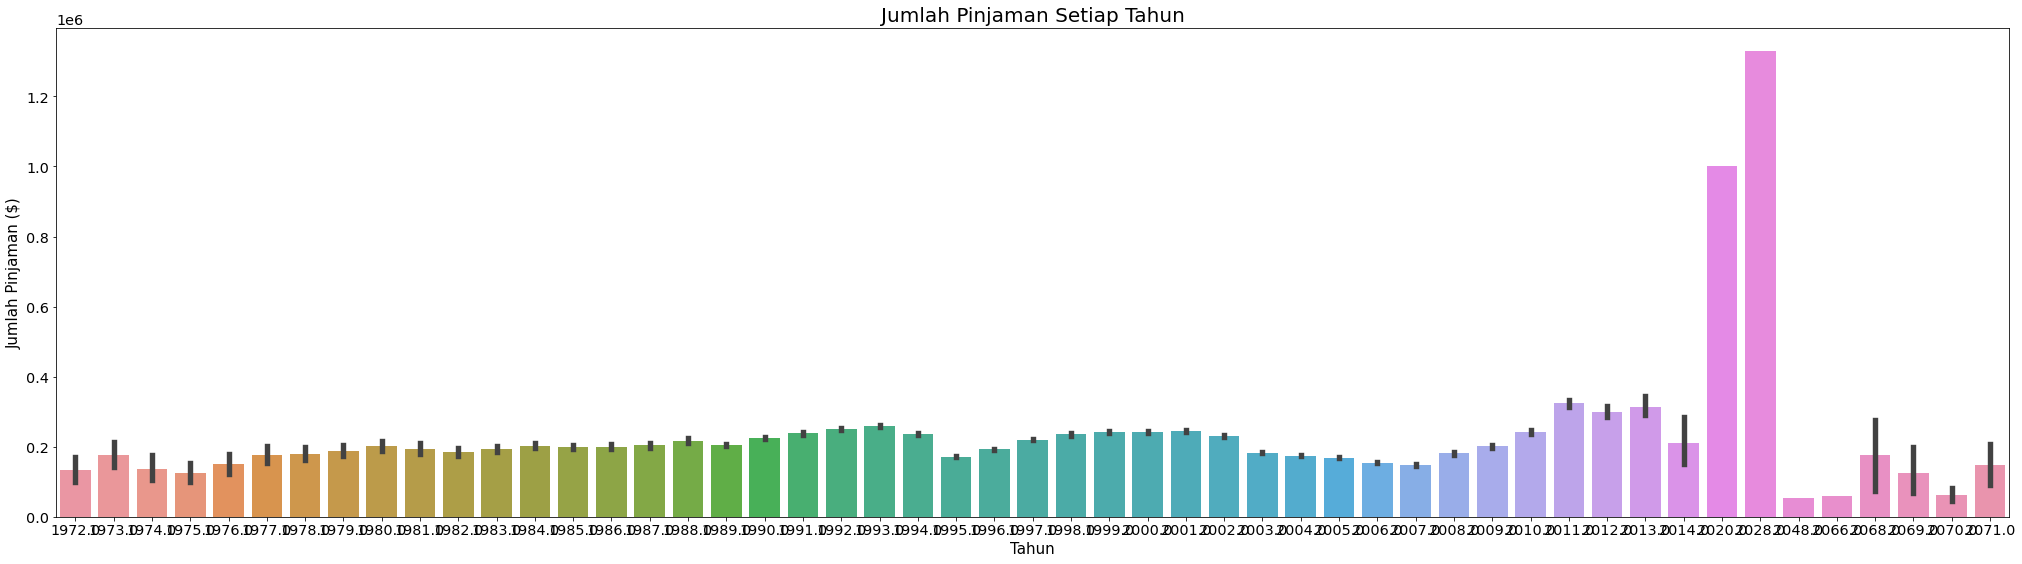

In [ ]:
#Membuat plot jumlah pinjaman setiap tahunya
f, ax = plt.subplots(figsize=(35,9))
sns.barplot(x=df['DisbursementDate'].dt.year, y="DisbursementGross",data=df)
plt.title('Jumlah Pinjaman Setiap Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Pinjaman ($)', fontsize=15)

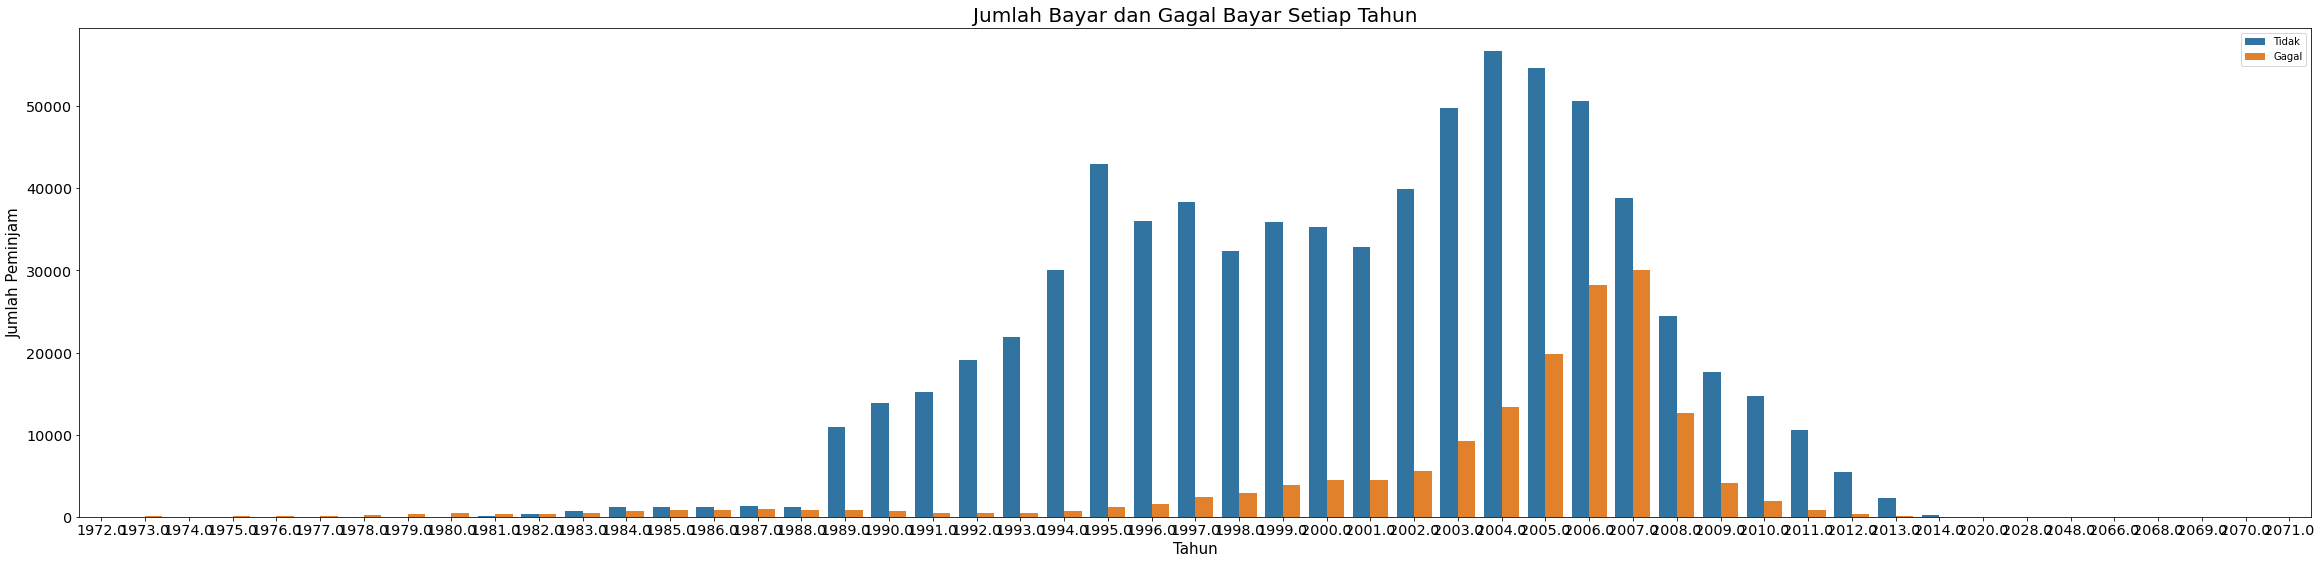

In [ ]:
#Melihat jumlah yang bayar dan gagal bayar setiap tahunya
plt.subplots(figsize=(40,9))
sns.countplot(x=df['DisbursementDate'].dt.year,hue=df['MIS_Status'])
plt.title('Jumlah Bayar dan Gagal Bayar Setiap Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Peminjam', fontsize=15)
plt.legend(["Tidak", "Gagal"],loc='upper right')

## **CHAPTER IV. DATA PRE-PROCESSING**

### **4.1. Data Cleansing**

In [ ]:
#cek data secara general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899028 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899028 non-null  int64         
 1   Name               899014 non-null  object        
 2   City               898998 non-null  object        
 3   State              899014 non-null  object        
 4   Zip                899028 non-null  int64         
 5   Bank               897469 non-null  object        
 6   BankState          897462 non-null  object        
 7   NAICS              899028 non-null  object        
 8   ApprovalDate       899028 non-null  datetime64[ns]
 9   ApprovalFY         899028 non-null  int64         
 10  Term               899028 non-null  int64         
 11  NoEmp              899028 non-null  int64         
 12  NewExist           899028 non-null  int64         
 13  CreateJob          899028 non-null  int64   

#### **4.1.1. Handle Missing Values**

##### **a. Null Value**

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2579
ChgOffDate           736343
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1995
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**Tanpa memperhitungkan null values pada feature ChgOffDate hanya ada 1.6% null values dari keseluruhan data maka hal yang terbaik dilakukan adalah dengan mendrop baris dengan null values daripada melakukan imputasi**

In [ ]:
# Drop null values
# Name, City, Bank dan ChgOffDate, LowDoc akan didrop sehingga null valuesnya tidak berpengaruh

df.dropna(subset=['State','BankState','LowDoc','RevLineCr','DisbursementDate','MIS_Status'], inplace=True)

# Periksa kembali null values
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     28
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725410
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

##### **b. Error Value**

In [ ]:
# Filter values NewExist hanya 1 dan 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

# Filer values RevLineCr hanya Y dan N
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]

# Filter Term hanya yg >1 bulan dan <= 504 bulan (42 tahun)
df = df[(df['Term'] >= 1) & (df['Term'] <= 504)]

# Filter NoEmp hanya yg memiliki nilai >=1
df = df[df['NoEmp'] >= 1]

# Filter tahun pencairan tidak lebih dari 2010
# df = df[df['DisbursementDate'] <= pd.Timestamp(2010, 12, 31)] harunys januari awal gasi?

In [ ]:
#df = df[(df['Term'] >= 1) & (df['Term'] <= 456)]

In [ ]:
#df = df[df['DisbursementDate'] <= pd.Timestamp(2010, 1, 1)]

In [ ]:
#df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

#### **4.1.2. Handle Duplicated Data**

In [ ]:
# Memeriksa data duplikat
df.duplicated().any()

False

**Observation Result:** Data tidak memiliki nilai yg duplikat.

#### **4.1.3. Fearture Encoding**

In [ ]:
# 1 jika bisnis merupakan bisnis baru 0 jika bisnis adalah bisnis yang sudah berdiri lebih dari 2 tahun
df['NewExist'] = np.where((df.NewExist == 2),1,0)

In [ ]:
# 1 jika bisnis melakukan Revolving Line of Credit 0 jika tidak
df['RevLineCr'] = np.where((df.RevLineCr == 'Y'),1,0)

In [ ]:
# 1 jika bisnis dinyatakan gagal bayar pinjaman dan 0 jika bisnis dinyatakan berhasil bayar
df['IsDefault'] = np.where((df.MIS_Status == 'CHGOFF'),1,0)

In [ ]:
#df['LowDoc'] = np.where((df.LowDoc == 'Y'),1,0)

### **4.2. Feature Engineering**

#### **4.2.1. Feature Extraction**

**Membuat feature baru dari feature yang sudah ada**

###### **a. RealEstate**

In [ ]:
df['RealEstate'] = np.where(df['Term'] > 240, 1, 0)

###### **b. SBA_AppvPct**

In [ ]:
# Membuat feature SBA_AppvPct untuk melihat persentase pinjaman yang dijamin oleh SBA
df['SBA_AppvPct'] = df['SBA_Appv']/df['GrAppv']

###### **c. StateSame**

In [ ]:
# Peminjam dan Bank berada pada state yang sama
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

###### **d. DefRateState**

In [ ]:
stg = df.groupby(['State','MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
stg['DefRateState'] = 100 * stg['TotalMIS_Status']/stg.groupby('State')['TotalMIS_Status'].transform('sum')

stg = stg[stg['MIS_Status']=='CHGOFF']
stg = stg[['State','DefRateState']]

In [ ]:
stg.sort_values(by='DefRateState')

,State,DefRateState
52,MT,6.340
100,WY,6.342
82,SD,6.773
92,VT,7.387
56,ND,7.523
58,NE,9.505
24,IA,9.625
42,ME,9.854
64,NM,11.010
60,NH,11.215


In [ ]:
# Memeriksa kesesuaian State dan Default Rate-nya
df.merge(stg, on='State', how='inner')[['State','DefRateState']].sample(5)

,State,DefRateState
318029,PA,15.616
17291,FL,29.405
281652,IA,9.625
232446,CA,21.855
85925,IL,24.890


In [ ]:
# Menetapkan pada df baru
df = df.merge(stg, on='State', how='inner')

###### **e. Industry**

In [ ]:
# Membuat kolom baru Industri dengan mengambil dua digit pertama pada kode NAICS 
df['Industry'] = df['NAICS'].apply(lambda x: x[:2])

# Melakukan mapping Industri berdasarkan dua digit pertama kode NAICS
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
    })

###### **f. DefRateIndustry**

In [ ]:
idg = df.groupby(['Industry','MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
idg['DefRateIndustry'] = 100 * idg['TotalMIS_Status']/idg.groupby('Industry')['TotalMIS_Status'].transform('sum')
idg = idg[idg['MIS_Status']=='CHGOFF']
idg = idg[['Industry','DefRateIndustry']]

In [ ]:
idg.sort_values(by='DefRateIndustry')

,Industry,DefRateIndustry
4,Ag/For/Fish/Hunt,9.288
22,Min/Quar/Oil_Gas_ext,9.656
14,Healthcare/Social_assist,11.035
28,Public_Admin,15.169
18,Manufacturing,16.700
36,Utilities,18.640
20,Mgmt_comp,20.561
26,Prof/Science/Tech,21.064
38,Wholesale_trade,21.287
24,Other_no_pub,21.519


In [ ]:
# Memeriksa kesesuaian Industry dan Default Rate-nya
df.merge(idg, on='Industry', how='outer')[['Industry', 'DefRateIndustry']].sample(5)

,Industry,DefRateIndustry
353697,Finance/Insurance,35.314
472965,Prof/Science/Tech,21.064
402237,Other_no_pub,21.519
455058,Prof/Science/Tech,21.064
462629,Prof/Science/Tech,21.064


In [ ]:
# Menetapkan pada df baru
df = df.merge(idg, on='Industry', how='outer')

###### **g. IsFranchise**

In [ ]:
# Membuat feature yg menunjukkan apakah bisnis ...
df['IsFranchise'] = df['FranchiseCode'].apply(lambda x: 1 if x >1 else 0)

##### **h. Recession**

In [ ]:
# Membuat kolom Recession yang menunjukkan apakah peminjam ini aktif pada masa resesi (1 des 2007 - 30 jun 2009)
# Jika aktif maka 1, jika tidak maka 0

df['Recession'] = np.where(((df['DisbursementDate'].dt.year >= 2007) & (df['DisbursementDate'].dt.year <= 2009)) | 
                          ((df['DisbursementDate'].dt.year < 2007) & (df['DisbursementDate'].dt.year + (df['Term']/12) >= 2007)), 1, 0)

#### **4.2.2. Additional Features**

**Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset)**
1. RealEstate
2. SBA_AppvPct
3. StateSame
4. DefRateState
5. Industry
6. DefRateIndustry
7. IsFranchise

#### **4.2.3. Feature Selection**

Membuang feature yang kurang relevan atau redundant

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571875 entries, 0 to 571874
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      571875 non-null  int64         
 1   Name               571868 non-null  object        
 2   City               571848 non-null  object        
 3   State              571875 non-null  object        
 4   Zip                571875 non-null  int64         
 5   Bank               571875 non-null  object        
 6   BankState          571875 non-null  object        
 7   NAICS              571875 non-null  object        
 8   ApprovalDate       571875 non-null  datetime64[ns]
 9   ApprovalFY         571875 non-null  int64         
 10  Term               571875 non-null  int64         
 11  NoEmp              571875 non-null  int64         
 12  NewExist           571875 non-null  int64         
 13  CreateJob          571875 non-null  int64   

In [ ]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'IsDefault', 'RealEstate', 'SBA_AppvPct', 'StateSame', 'DefRateState',
       'Industry', 'DefRateIndustry', 'IsFranchise', 'Recession'],
      dtype='object')

In [ ]:
df = df.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
              'NAICS', 'ApprovalDate', 'ApprovalFY','FranchiseCode', 'UrbanRural',
              'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
              'BalanceGross', 'MIS_Status', 'ChgOffPrinGr','SBA_Appv','Industry'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571875 entries, 0 to 571874
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Term             571875 non-null  int64  
 1   NoEmp            571875 non-null  int64  
 2   NewExist         571875 non-null  int64  
 3   CreateJob        571875 non-null  int64  
 4   RetainedJob      571875 non-null  int64  
 5   RevLineCr        571875 non-null  int64  
 6   LowDoc           571875 non-null  int64  
 7   GrAppv           571875 non-null  float64
 8   IsDefault        571875 non-null  int64  
 9   RealEstate       571875 non-null  int64  
 10  SBA_AppvPct      571875 non-null  float64
 11  DefRateState     571875 non-null  float64
 12  DefRateIndustry  418693 non-null  float64
 13  IsFranchise      571875 non-null  int64  
 14  Recession        571875 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 69.8 MB


In [ ]:
df.isnull().sum()

Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
RevLineCr               0
LowDoc                  0
GrAppv                  0
IsDefault               0
RealEstate              0
SBA_AppvPct             0
DefRateState            0
DefRateIndustry    153182
IsFranchise             0
Recession               0
dtype: int64

In [ ]:
df

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Variables')

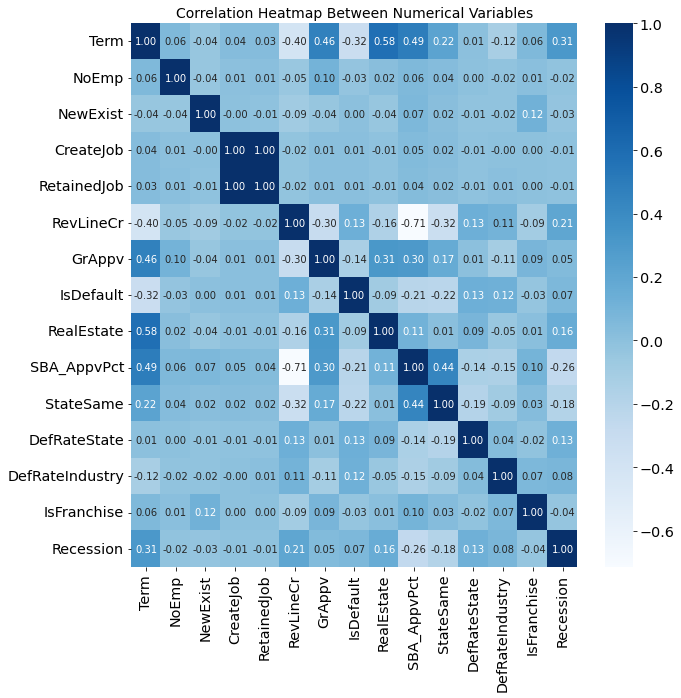

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Variables', fontsize=14)

### **4.3. Handle Outliers**

**Check data kembali sebelum handling outliers :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610224 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      610224 non-null  int64         
 1   Name               610215 non-null  object        
 2   City               610196 non-null  object        
 3   State              610224 non-null  object        
 4   Zip                610224 non-null  int64         
 5   Bank               610224 non-null  object        
 6   BankState          610224 non-null  object        
 7   NAICS              610224 non-null  object        
 8   ApprovalDate       610224 non-null  datetime64[ns]
 9   ApprovalFY         610224 non-null  int64         
 10  Term               610224 non-null  int64         
 11  NoEmp              610224 non-null  int64         
 12  NewExist           610224 non-null  int64         
 13  CreateJob          610224 non-null  int64   

Yang akan dilakukan handling outliers hanya data numerik berikut : 
* 1. GrAppv
* 2. DisbursementGross
* 3. SBA_Appv

Kami melakukan handling outliers 1 per 1. Setiap setelah handling pada 1 variabel kami mengecek kembali distribusi datanya, karena setiap handling outliers pada 1 variabel maka akan mempengaruhi outliers pada variabel lainnya.

In [ ]:
numeric_ohandling= ['GrAppv','DisbursementGross','SBA_Appv']
df[numeric_ohandling].sample(5)

,GrAppv,DisbursementGross,SBA_Appv
203451,5000.0,5000.0,2500.0
620742,120000.0,206162.0,60000.0
881939,465000.0,452000.0,465000.0
124146,100000.0,356260.0,50000.0
823395,150000.0,483139.0,75000.0


##### **1. GrAppv**

**Log-Transform**

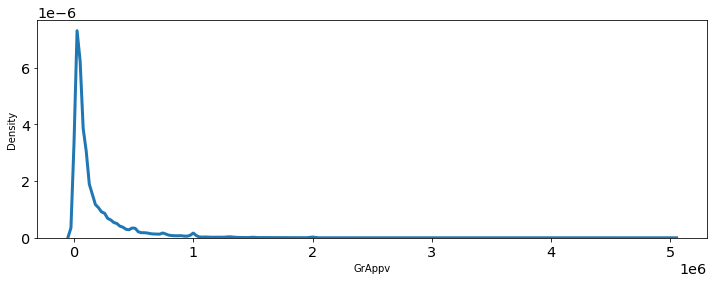

In [ ]:
#distribusi GrAppv (nilai asli)
sns.kdeplot(df['GrAppv'])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


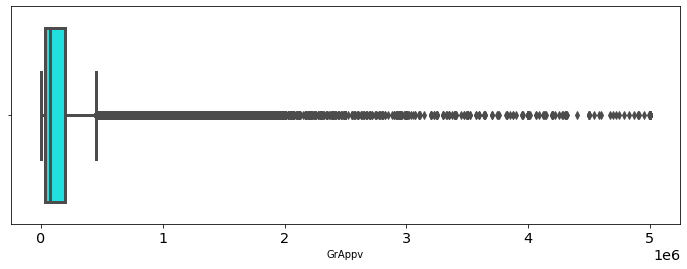

In [ ]:
#melihat distribusi GrAppv (nilai asli)
sns.boxplot(x=df['GrAppv'], color='cyan', orient='v')

Sebelum handling outliers terlihat bahwa distribusi dari GrAppv masih mempunyai outliers

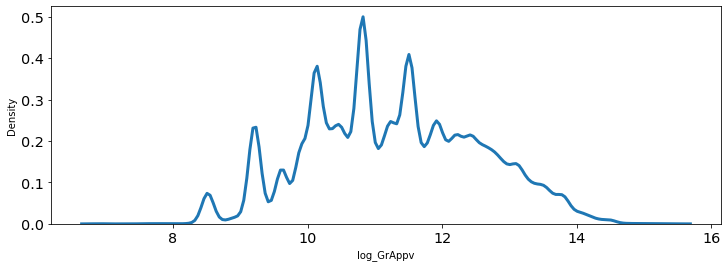

In [ ]:
# distribusi GrAppv (setelah log transformation)
df['log_GrAppv'] = np.log(df['GrAppv'])
sns.kdeplot(df['log_GrAppv'])
# lebih mendekati distribusi normal

In [ ]:
df.sample(1)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,log_GrAppv
14312,1103314002,"GOLFBIZ USA, INC.",LAS VEGAS,NV,89102,CITY NATIONAL BANK,NV,421910,1997-04-07,1997,84,3,1.0,0,0,1,0,N,N,NaT,1998-05-31,102221.0,0.0,P I F,0.0,102500.0,76875.0,11.537618


In [ ]:
new_numeric_GrAppv = ['GrAppv','log_GrAppv']
df[new_numeric_GrAppv].describe()

,GrAppv,log_GrAppv
count,6.102240e+05,610224.000000
mean,1.714596e+05,11.276397
std,2.576558e+05,1.265047
min,1.000000e+03,6.907755
25%,3.000000e+04,10.308953
50%,7.500000e+04,11.225243
75%,2.000000e+05,12.206073
max,5.000000e+06,15.424948


In [ ]:
df[new_numeric_GrAppv].count()

GrAppv        610224
log_GrAppv    610224
dtype: int64

**Actual Outlier Handling Using Z-score method**

In [ ]:
#from scipy import stats

print(f"Jumlah baris log_GrAppv sebelum memfilter outlier: {len(df['log_GrAppv'])}")

filtered_entries = np.array([True] * len(df['log_GrAppv']))

for col in new_numeric_GrAppv:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f"Jumlah baris log_GrAppv setelah memfilter outlier: {len(df['log_GrAppv'])}")

Jumlah baris log_GrAppv sebelum memfilter outlier: 610224
Jumlah baris log_GrAppv setelah memfilter outlier: 595558


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


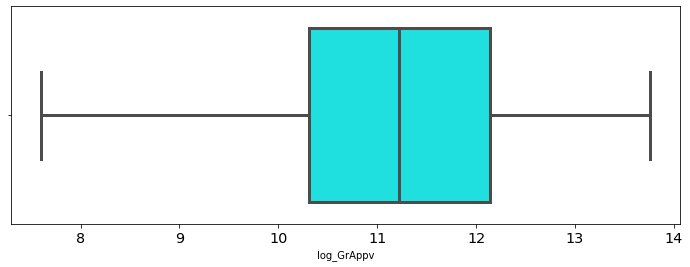

In [ ]:
#Melihat visualisasi distribusi GrAppv setelah handling outliers
sns.boxplot(x=df['log_GrAppv'], color='cyan', orient='v')

Terlihat bahwa outliers sudah tidak ada.

In [ ]:
df[new_numeric_GrAppv].describe()

,GrAppv,log_GrAppv
count,595558.000000,595558.000000
mean,144018.810860,11.209450
std,176101.412055,1.202443
min,2000.000000,7.600902
25%,30000.000000,10.308953
50%,75000.000000,11.225243
75%,187000.000000,12.138864
max,944000.000000,13.757881


##### **2. DisbursementGross**

**Log-Transform**

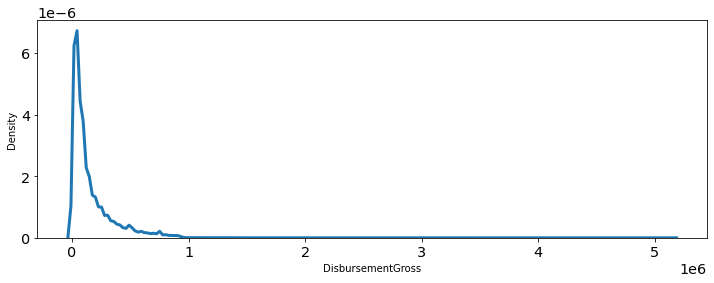

In [ ]:
# distribusi DisbursementGross (sebelum log-transformation)
sns.kdeplot(df['DisbursementGross'])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


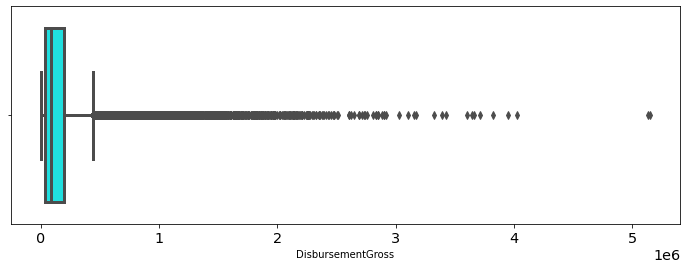

In [ ]:
#Melihat visualisasi sebelum handling outliers
sns.boxplot(x=df['DisbursementGross'], color='cyan', orient='v')

Sebelum handling outliers terlihat bahwa distribusi dari DisbursementGross masih mempunyai outliers

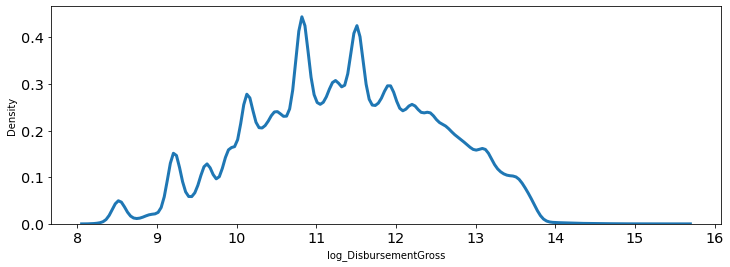

In [ ]:
# distribusi DisbursementGross (setelah log transformation)
df['log_DisbursementGross'] = np.log(df['DisbursementGross'])
sns.kdeplot(df['log_DisbursementGross'])
# lebih mendekati distribusi normal

In [ ]:
df.sample(1)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,log_GrAppv,log_DisbursementGross
351901,3450924001,TO THE POINT INC,NEWPORT,RI,2840,BANK OF AMERICA NATL ASSOC,RI,488991,1999-12-07,2000,48,4,1.0,0,4,1,1,Y,N,NaT,2000-01-31,50670.0,0.0,P I F,0.0,20000.0,10000.0,9.903488,10.833089


In [ ]:
new_numeric_log_DisbursementGross = ['DisbursementGross','log_DisbursementGross']
df[new_numeric_log_DisbursementGross].describe()

,DisbursementGross,log_DisbursementGross
count,5.955580e+05,595558.000000
mean,1.571963e+05,11.360263
std,1.856990e+05,1.149329
min,4.000000e+03,8.294050
25%,3.898775e+04,10.571003
50%,8.800000e+04,11.385092
75%,2.000000e+05,12.206073
max,5.148858e+06,15.454286


**Actual Outlier Handling Using Z-score method**

In [ ]:
#from scipy import stats

print(f"Jumlah baris log_DisbursementGross sebelum memfilter outlier: {len(df['log_DisbursementGross'])}")

#filtered_entries = np.array([True] * len(df['log_DisbursementGross']))

#for col in new_numeric_log_DisbursementGross:
#    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
#    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f"Jumlah baris log_DisbursementGross setelah memfilter outlier: {len(df['log_DisbursementGross'])}")

Jumlah baris log_DisbursementGross sebelum memfilter outlier: 595558
Jumlah baris log_DisbursementGross setelah memfilter outlier: 580763


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


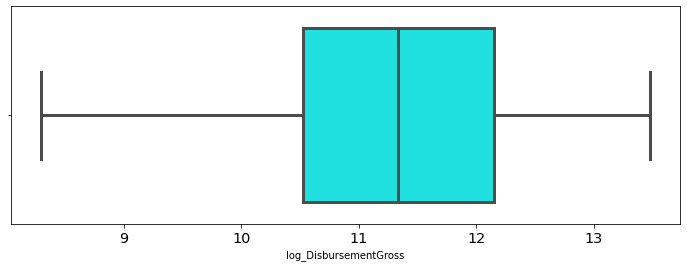

In [ ]:
#Melihat visualisasi distribusi DisbursementGross setelah handling outliers
sns.boxplot(x=df['log_DisbursementGross'], color='cyan', orient='v')

Terlihat bahwa outliers sudah tidak ada.

In [ ]:
df[new_numeric_log_DisbursementGross].describe()

,DisbursementGross,log_DisbursementGross
count,580763.000000,580763.000000
mean,139544.318252,11.302315
std,147218.397058,1.103947
min,4000.000000,8.294050
25%,37225.000000,10.524736
50%,83840.000000,11.336665
75%,190000.000000,12.154779
max,714272.000000,13.479019


##### **3. SBA_Appv**

**Log-Transform**

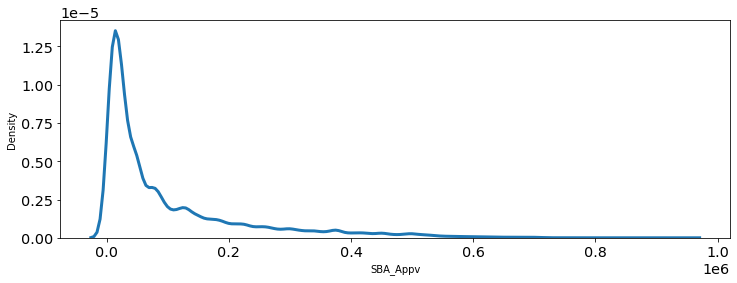

In [ ]:
# distribusi SBA_Appv (sebelum log-transformation)
sns.kdeplot(df['SBA_Appv'])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


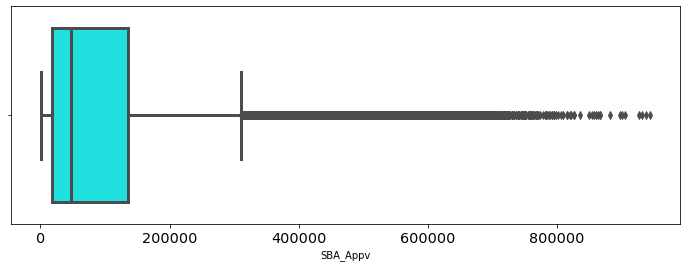

In [ ]:
#Melihat visualisasi sebelum handling outliers
sns.boxplot(x=df['SBA_Appv'], color='cyan', orient='v')

Terlihat bahwa distribusi dari SBA_Appv masih memiliki banyak outliers

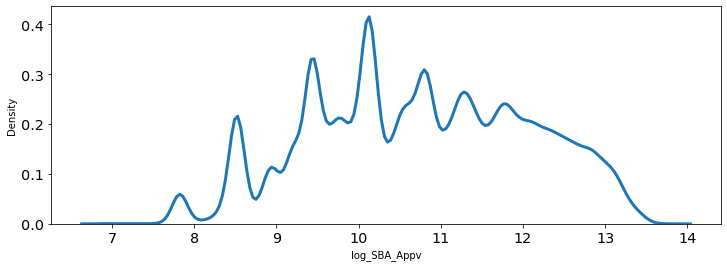

In [ ]:
# distribusi SBA_Appv (setelah log transformation)
df['log_SBA_Appv'] = np.log(df['SBA_Appv'])
sns.kdeplot(df['log_SBA_Appv'])
# lebih mendekati distribusi normal

In [ ]:
df.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,log_GrAppv,log_DisbursementGross,log_SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,11.002100,11.002100,10.778956
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,10.596635,10.596635,10.373491


In [ ]:
new_numeric_log_SBA_Appv = ['SBA_Appv','log_SBA_Appv']
df[new_numeric_log_SBA_Appv].describe()

,SBA_Appv,log_SBA_Appv
count,580763.000000,580763.000000
mean,100420.638419,10.750774
std,126043.310851,1.315310
min,1000.000000,6.907755
25%,17500.000000,9.769956
50%,46891.000000,10.755581
75%,135000.000000,11.813030
max,944000.000000,13.757881


**Actual Outlier Handling Using Z-score method**

In [ ]:
#from scipy import stats

print(f"Jumlah baris log_SBA_Appv sebelum memfilter outlier: {len(df['log_SBA_Appv'])}")

#filtered_entries = np.array([True] * len(df['log_SBA_Appv']))

#for col in new_numeric_log_SBA_Appv:
#    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
#    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f"Jumlah baris log_SBA_Appv setelah memfilter outlier: {len(df['log_SBA_Appv'])}")

Jumlah baris log_SBA_Appv sebelum memfilter outlier: 580763
Jumlah baris log_SBA_Appv setelah memfilter outlier: 566712


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


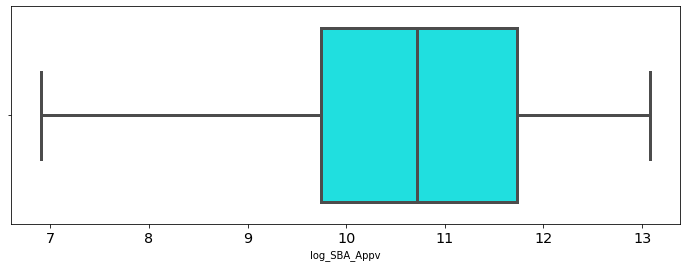

In [ ]:
#Melihat visualisasi setelah handling outliers
sns.boxplot(x=df['log_SBA_Appv'], color='cyan', orient='v')

Terlihat bahwa outliers sudah tidak ada.

In [ ]:
df[new_numeric_log_SBA_Appv].describe()

,SBA_Appv,log_SBA_Appv
count,566712.000000,566712.000000
mean,89200.965875,10.689635
std,104759.774285,1.272058
min,1000.000000,6.907755
25%,17000.000000,9.740969
50%,45000.000000,10.714418
75%,125000.000000,11.736069
max,478550.000000,13.078516


### **4.4. Standardization**

Sebelum melakukan Standarisasi dan normalisasi, datanya di split dulu train dan test

### **4.5. Class Imbalance**

**NOTES:** apabila ingin melakukan **Overfitting** atau **Underfitting** pastikan pisahkan dahulu data training dan data testing